Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [44]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [45]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [46]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [47]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [48]:
print len(enrollments)
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
print len(unique_enrolled_students)

print len(daily_engagement)
unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
print len(unique_engagement_students)

print len(project_submissions)
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
print len(unique_project_submitters)

1640
1302
136240
1237
3642
743


## Problems in the Data

In [49]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [50]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break


        
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [51]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Tracking Down the Remaining Problems

In [52]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [53]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [54]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [55]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

995

## Getting Data from First Week

In [56]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [57]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data


In [58]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [70]:
def add_has_visit(data):
    for data_point in data:
        if data_point['num_courses_visited'] != 0:
            data_point['has_visited'] = 1
        else:
            data_point['has_visited'] = 0
            
add_has_visit(paid_engagement)


In [71]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    if within_one_week(join_date,engagement_record['utc_date']) :
        paid_engagement_in_first_week.append(engagement_record)
        
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [72]:
from collections import defaultdict

def group_data(paid_list,attributes):
    grouped_data = defaultdict(list)
    for engagement_record in paid_list:
        account_key = engagement_record[attributes]
        grouped_data[account_key].append(engagement_record)
    return grouped_data
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')



In [79]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_attribute_one_student(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data


total_minutes_by_account = sum_attribute_one_student(engagement_by_account,'total_minutes_visited')


In [80]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [81]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

## Lessons Completed in First Week

In [82]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
total_lessons_by_account = sum_attribute_one_student(engagement_by_account,'lessons_completed')
total_lessons = total_lessons_by_account.values()
describe_data(total_lessons)

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [83]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
days_visited_by_account = sum_attribute_one_student(engagement_by_account,'has_visited')
total_days = days_visited_by_account.values()
describe_data(total_days)


## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [90]:
passing_engagement = []
non_passing_engagement = []
passing_subway = set()

subway_project_lesson_keys = ['746169184', '3176718735']
for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and \
    (submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION') :
        passing_subway.add(submission['account_key'])
        
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in passing_subway:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
    
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [97]:


## Minutes spent
print '\nMinutes spent:\n'
print 'Passing Group:\n'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(passing_engagement_by_account,'total_minutes_visited')
total_minutes_passing = days_visited_by_account.values()
describe_data(total_minutes_passing)
print '\nNon Passing Group:\n'
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(non_passing_engagement_by_account,'total_minutes_visited')
total_minutes_non_passing = days_visited_by_account.values()
describe_data(total_minutes_non_passing)

## Lessons completed
print '\nLessons completed:\n'
print 'Passing Group:\n'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(passing_engagement_by_account,'lessons_completed')
total_lessons_passing = days_visited_by_account.values()
describe_data(total_lessons_passing)
print '\nNon Passing Group:\n'
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(non_passing_engagement_by_account,'lessons_completed')
total_lessons_non_passing = days_visited_by_account.values()
describe_data(total_lessons_non_passing)

## Days visited
print '\nDays visited:\n'
print 'Passing Group:\n'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(passing_engagement_by_account,'has_visited')
total_days_passing = days_visited_by_account.values()
describe_data(total_days_passing)
print '\nNon Passing Group:\n'
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(non_passing_engagement_by_account,'has_visited')
total_days_non_passing = days_visited_by_account.values()
describe_data(total_days_non_passing)

## Projects completed
print '\nProjects completed:\n'
print 'Passing Group:\n'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(passing_engagement_by_account,'projects_completed')
total_projects_passing = days_visited_by_account.values()
describe_data(total_projects_passing)
print '\nNon Passing Group:\n'
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(non_passing_engagement_by_account,'projects_completed')
total_projects_non_passing = days_visited_by_account.values()
describe_data(total_projects_non_passing)

## Courses visited
print '\nCourses visited:\n'
print 'Passing Group:\n'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(passing_engagement_by_account,'num_courses_visited')
total_courses_passing = days_visited_by_account.values()
describe_data(total_courses_passing)
print '\nNon Passing Group:\n'
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
days_visited_by_account = sum_attribute_one_student(non_passing_engagement_by_account,'num_courses_visited')
total_courses_non_passing = days_visited_by_account.values()
describe_data(total_courses_non_passing)


## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


Minutes spent:

Passing Group:

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

Non Passing Group:

Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

Lessons completed:

Passing Group:

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

Non Passing Group:

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27

Days visited:

Passing Group:

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

Non Passing Group:

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7

Projects completed:

Passing Group:

Mean: 0.00927357032457
Standard deviation: 0.110809572358
Minimum: 0
Maximum: 2

Non Passing Group:

Mean: 0.0
Standard deviation: 0.0
Minimum: 0
Maximum: 0

Courses visited:

Passing Group:

Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25

Non Passing Group:

Mean: 2.58908045977
St

## Making Histograms

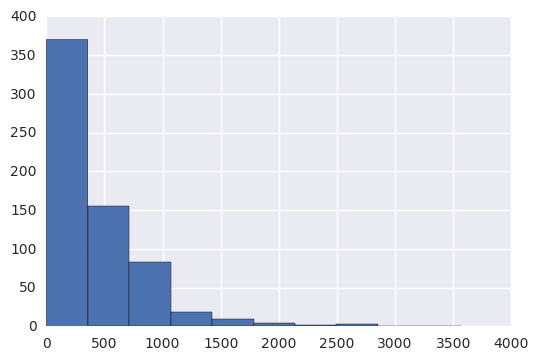

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
def making_hist(data):
    %matplotlib inline
    plt.hist(data)

making_hist(total_minutes_passing)



## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

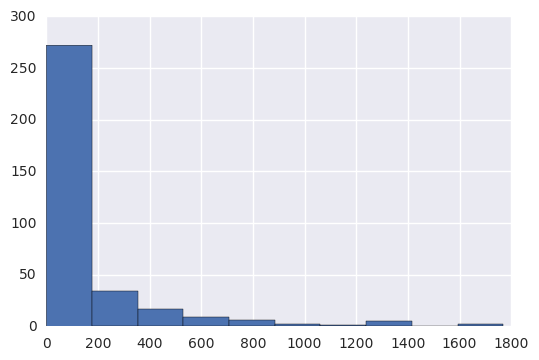

In [131]:
making_hist(total_minutes_non_passing)

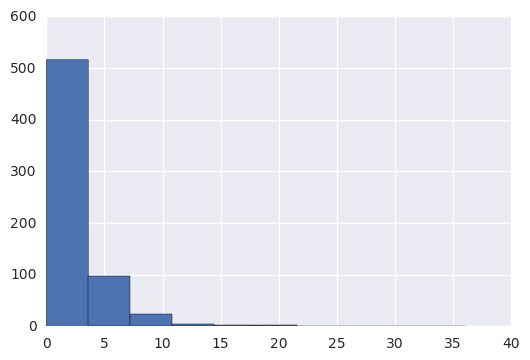

In [132]:
making_hist(total_lessons_passing)

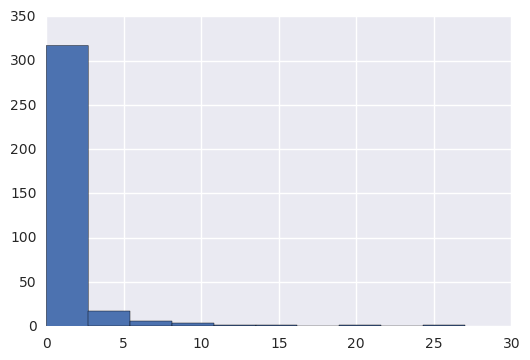

In [133]:
making_hist(total_lessons_non_passing)

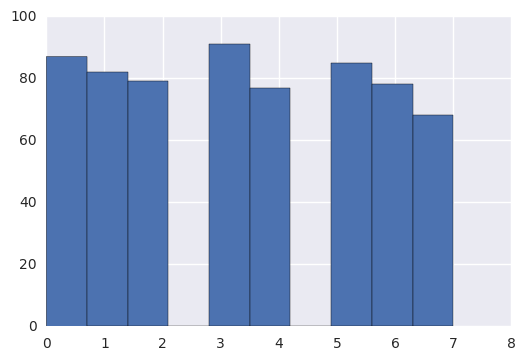

In [134]:
making_hist(total_days_passing)

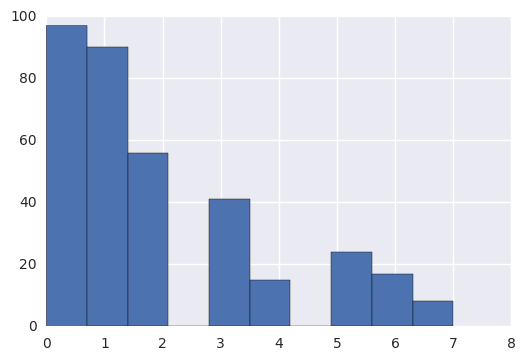

In [135]:
making_hist(total_days_non_passing)

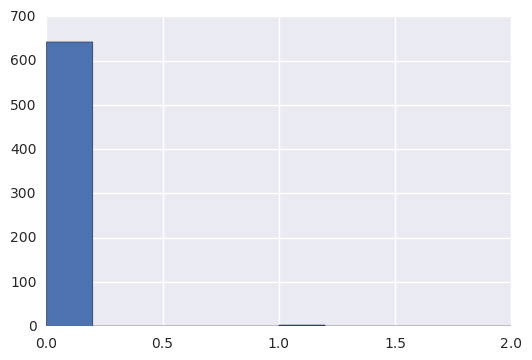

In [136]:
making_hist(total_projects_passing)

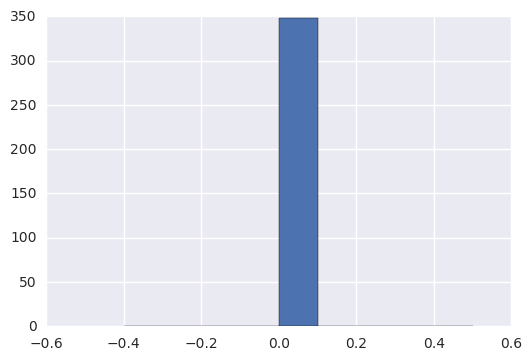

In [137]:
making_hist(total_projects_non_passing)

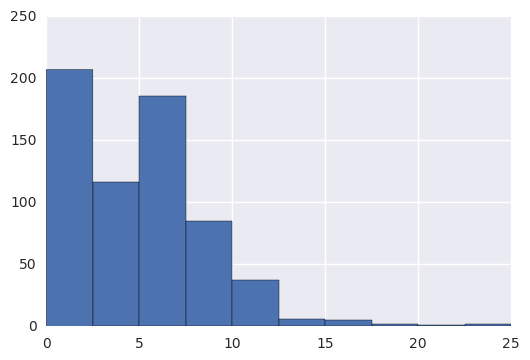

In [138]:
making_hist(total_courses_passing)

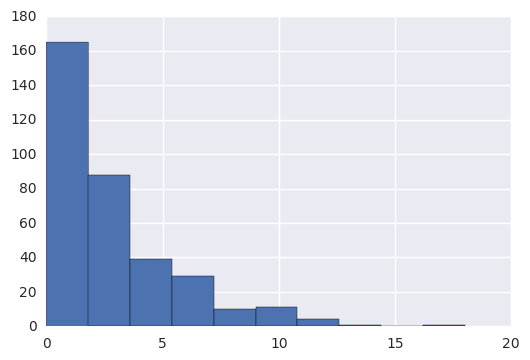

In [139]:
making_hist(total_courses_non_passing)

## Improving Plots and Sharing Findings

In [113]:
plt.hist(total_days_non_passing, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(total_days_passing, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')


## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.